# Auswertung von Wetterdaten
Im Österreich betreibt die ZAMG ein Netzwerk von Wetterstationen. Diese sind an den Datenverbund
der WMO (World Meteorological Organization) angeschlossen.
Auf [Ogimet](https://www.ogimet.com/cgi-bin/gsynres?lang=en&ind=11035&ndays=30&ano=2022&mes=05&day=07)
können diese Meldungen dekodiert angesehen werden. Eine Originalmeldung ist auf
[der Seite für den 7. Mai 2022](https://www.ogimet.com/cgi-bin/decomet?ind=11035&ano=2022&mes=05&day=07&hora=12&min=00&single=yes&lang=en)
zu sehen. Sie hat folgendes Aussehen:

```text
202205071200 AAXX 07121 11035 11570 83503 10171 20124 39969 40214 58004 69911 72562 885// 333 81826 88657==
```

Die Stationen liefern 1x pro Stunde (vor 2016 alle 3 Stunden) einen solchen Datensatz. Zur Auswertung
stehen 3 Datei zur Verfügung:

- In der Datei *synop_11034.txt.bz2* sind alle Meldungen der Station Wien Innere Stadt (WMO ID 11034)
  enthalten. Seehöhe: 177m
- Zum Vergleich sind in der Datei *synop_11082.txt.bz2* die Meldungen der Station Gumpoldskirchen
  (ca. 20 km südlich von Wien) gespeichert. Seehöhe: 212m
- Als höhergelegene Station sind in der Datei *synop_11180.txt.bz2* die Meldungen der Station
  Rax (Bergstation) gespeichert. Seehöhe: 1558m

Die Datei *parseSynop.py* kann diese Datei lesen und einen Dataframe mit den Daten zurückliefern.
Sie wird mit *import* am Anfang des Notebooks eingebunden.

## Erste Auswertung: Vergleich der Mittelwerte von Lufttemperatur, Taupunkt und Luftdruck

Es werden die Stundenwerte (ab 2016) bzw. die 3-Stunden Werte (vor 2016) der Stationen gegenübergestellt.

### Laden der Stationen

In [1]:
import pandas as pd
import parseSynop as ps    # Datei parseSynop.py laden
data_vienna = ps.readFile("synop_11034.txt.bz2")  # Wien Innere Stadt
data_gump = ps.readFile("synop_11082.txt.bz2")    # Gumpoldskirchen
data_rax = ps.readFile("synop_11180.txt.bz2")     # Rax Bergstation
data = pd.concat([data_gump, data_rax, data_vienna])
display(
    data
    .groupby(["station", "month"])
    .aggregate({"temp": ["min", "max", "mean"], "dewp": ["min", "max", "mean"], "pressure": ["min", "max", "mean"], "wind_speed": "max"})
)

temp                   dewp                  pressure          \
                min   max       mean   min   max       mean      min     max   
station month                                                                  
11034   1     -14.4  19.2   1.793264 -20.2  10.9  -2.202976    956.6  1025.2   
        2     -13.8  20.0   3.821300 -20.9  10.5  -1.489285    968.0  1024.7   
        3     -10.9  23.4   7.534122 -15.3  12.3   0.512738    962.9  1018.3   
        4      -2.3  30.0  12.762147 -14.7  19.5   4.116452    972.1  1011.2   
        5       3.0  33.5  16.695045  -5.3  22.5   9.066144    969.4  1011.2   
        6       8.9  37.5  21.545962  -0.4  23.3  12.979578    973.6  1008.1   
        7      11.9  37.8  22.813910 -14.9  23.5  13.935833    978.0  1006.7   
        8      10.7  38.6  22.472089   0.9  23.2  14.224550    976.1  1007.1   
        9       5.3  32.8  17.702769  -3.2  20.7  10.957815    973.0  1018.4   
        10     -0.7  27.2  12.189494  -5.2  17.6   7.347171    967.0  1016.3   
        11     -3.0  20.9   7.424529 -10.1  14.7   3.573764    959.3  1017.4   
        12    -12.5  19.1   3.219362 -19.2  11.9  -0.549523    961.5  1021.1   
11082   1     -16.5  19.8   0.916138 -19.9   9.7  -2.856021    950.2  1020.9   
        2     -14.8  21.2   2.889464 -21.4  10.1  -2.077573    963.0  1019.1   
        3     -13.9  23.3   6.569788 -16.9  10.9   0.025263    957.6  1013.0   
        4      -5.4  29.2  11.579362 -10.8  14.8   3.803482    966.8  1007.1   
        5       0.5  32.6  15.651174  -4.4  19.9   8.850870    952.0  1018.4   
        6       1.7  35.4  20.417246   0.7  22.6  12.671511    968.8  1005.4   
        7       8.2  37.2  21.877099   3.2  22.4  13.750937    948.0  1000.9   
        8       9.3  38.8  21.312145   3.7  23.2  13.879861    971.3  1002.3   
        9       0.8  33.8  16.450285  -0.5  20.0  10.521517    967.9  1014.2   
        10     -5.1  26.9  11.042735  -7.1  16.6   6.933005    961.5  1018.7   
        11     -7.7  21.4   6.528332 -11.1  15.2   3.098986    951.4  1011.9   
        12    -13.3  18.6   2.247609 -18.0  10.7  -1.080987    956.9  1016.3   
11180   1     -19.4  12.9  -4.230600 -33.8   4.0  -8.257152    803.4   862.5   
        2     -21.8  23.2  -3.406496 -31.9  16.0  -7.630552    815.2   862.1   
        3     -18.3  13.4  -1.499612 -33.8   5.7  -5.198408    811.2   857.8   
        4     -59.0  18.9   2.692710 -61.9   9.7  -1.650951    821.8   943.2   
        5      -5.7  23.1   6.701922 -22.5  17.2   3.238890    820.5   945.6   
        6      -1.8  26.3  11.460705 -14.9  18.4   7.537427    827.5   856.9   
        7       1.1  27.5  12.697729  -3.8  17.2   8.458805    829.6   947.0   
        8      -0.2  28.8  12.927968  -6.3  18.5   8.740496    828.9   857.0   
        9      -3.2  24.2   8.759194 -21.4  16.1   5.263074    821.4   860.4   
        10    -11.5  20.5   5.238622 -28.2  12.8   0.817491    818.1   975.6   
        11    -12.2  17.6   1.602658 -30.8  11.2  -2.593652    810.8   940.9   
        12    -19.6  14.7  -1.679196 -33.1   5.8  -6.462571    812.7   860.1   

                          wind_speed  
                     mean        max  
station month                         
11034   1      996.750815       14.0  
        2      997.053268       14.0  
        3      995.715862       13.0  
        4      993.916782       11.0  
        5      994.175150       14.0  
        6      994.477183       13.0  
        7      994.319359       11.0  
        8      995.117469       12.0  
        9      997.416730       11.0  
        10     997.198813       13.0  
        11     996.078758       14.0  
        12     998.504610       13.0  
11082   1      991.345564       27.0  
        2      991.811667       15.0  
        3      990.668776       15.0  
        4      988.975517       20.0  
        5      989.114644       18.0  
        6      989.697714       19.0  
        7      989.177756       15.0  
        8      990.036978       18.0

## Häufigkeitsverteilungen

Um einen Datenbestand systematisch zu analysieren bestimmen wir - neben den Lagemaßen wie
Mittelwert, Standardabweichung, ... die Verteilung der Werte. *groupby()* und *aggregate()* wurden
schon oft dafür verwendet. Hilfreich: Bei *aggregate()* können wir auch benutzerdefinierte Spaltennamen als
Argumentname angeben. Ein Tupel aus Spaltenname und Aggregierungsfunktion bestimmt dann, wie
aggregiert wird.

Eine einfache Funktion ist die Funktion *describe()*. Damit wollen wir bestimmen, welche
Höchstwerte im Juli in Wien vorkommen. Dafür ermitteln wir die Durchschnitts-, Maximal- und
Minimaltemperatur mit einer einfachen Gruppierung. Tmax wird 1x am Tag übermittelt, aber durch
die *max()* Funktion bekommen wir diesen Wert in unserer Tagesstatistik.

*describe()* gibt diese Übersicht für jede Spalte aus. Damit wir mehrere Spalten (Jahr, Monat, Tag)
ausschließen selektieren wir - wie gewohnt - eine Liste der Spalten, die im Dataframe ausgegeben
werden soll. Durch das columns Attribut und eine Slice Operation wird ab der 4. Spalte ausgegeben.
Da wir gleichzeitig nach Werten (Monat = 7) und Spalten (ab der 4. Spalte) filtern wollen, verwenden
wir *loc*.

In [2]:
vienna_daily = data[data.station == 11034] \
    .groupby(["date", "year", "month", "day"]) \
    .aggregate(Tavg=("temp", "mean"), Tmax=("max_temp", "max"), Tmin=("min_temp", "min")) \
    .reset_index()
display(vienna_daily.head(3))
vienna_daily.loc[vienna_daily.month == 7, vienna_daily.columns[4:]] \
    .describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,date,year,month,day,Tavg,Tmax,Tmin
0,2000-01-01,2000,1,1,1.1125,2.6,-0.9
1,2000-01-02,2000,1,2,0.7250,2.1,-1.1
2,2000-01-03,2000,1,3,1.0375,4.2,1.6


,Tavg,Tmax,Tmin
count,662.000000,640.000000,644.00000
mean,22.798524,27.842969,18.71972
std,3.393181,4.624560,2.72742
min,14.094444,14.500000,11.60000
10%,18.231250,21.490000,15.03000
20%,19.787500,23.800000,16.30000
30%,20.959728,25.500000,17.10000
40%,21.967500,26.900000,17.80000
50%,22.958333,28.250000,18.70000
60%,23.843667,29.300000,19.50000


Wir erkennen: Es gibt 662 Werte für die Temperatur, die nicht NaN (also NULL) sind. Tmax und Tmin
ist etwas seltener im Datenbestand. Die Perzentilen geben uns einen direkten Überblick über die
Wahrscheinlichkeit des Auftretens eines Wertes. Ist z. B. die 90% Perzentile 33.6°, haben 90% der
Tage einen Höchstwert kleiner oder gleich 33.6°.

Der Median ist die 50% Perzentile. Der Mittelwert (27.8°) entspricht in etwa diesem Wert (28.3°).
Die Standardabweichung beträgt 4.62°.

Da der Mensch aber visuelle Eindrücke leichter interpretieren kann, können wir mit *df.plot.hist()*
ein Histogramm erstellen. Wir verwenden 20 Kategorien. Bei zu vielen Kategorien erscheint das
Histogramm "zerfranst". Auf *https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html*
und *https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html*
gibt es einen Überblick über die Parameter.

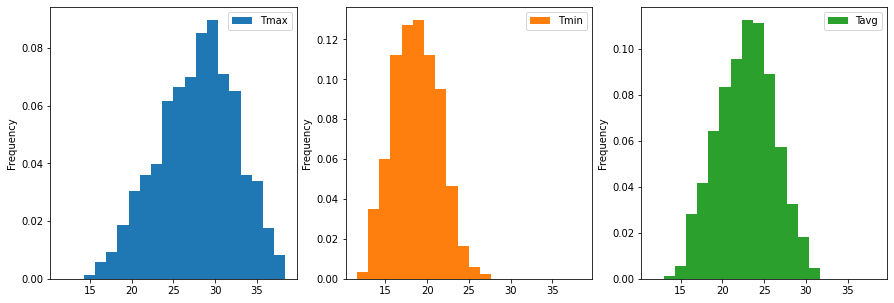

In [3]:
vienna_daily.loc[vienna_daily.month == 7,["Tmax", "Tmin", "Tavg"]].plot.hist( \
    subplots=True,   # Pro Spalte einen Plot
    layout=(1,3),    # 1 Zeile, 3 Spalten
    bins=20,         # 20 Kategorien
    figsize=(15, 5), # 15 in breit, 5 in hoch
    grid=False,      # kein Grid
    density=True);   # relative Häufigkeiten. Der ; verhindert die Ausgabe der Infos, da der
                     # Rückgabewert des letzte Statements sonst ausgegeben wird.

### Wahrscheinlichkeit des Auftretens - die empirische Verteilungsfunktion

Die Verteilungsfunktion *P(X<x)* gibt an, wie groß die Wahrscheinlichkeit ist, dass ein Wert kleiner
als ein übergebener Wert x ist. Nun wollen wir anhand des Datenbestandes herausfinden, wie wahrscheinlich
ein Tag über 30°, 35° oder 40° im Juli ist. In Wirklichkeit ist es ein einfaches Zählproblem:

In [4]:
tmax_vienna_july = vienna_daily.loc[(vienna_daily.month == 7) & (vienna_daily.Tmax.notna()), "Tmax"]

print(f"An {round(100*((tmax_vienna_july >= 30).sum()/tmax_vienna_july.count()), 1)} % der Tage hat es 30° oder mehr.")
print(f"An {round(100*((tmax_vienna_july >= 35).sum()/tmax_vienna_july.count()), 1)} % der Tage hat es 35° oder mehr.")
print(f"An {round(100*((tmax_vienna_july >= 40).sum()/tmax_vienna_july.count()), 1)} % der Tage hat es 40° oder mehr.")


An 35.5 % der Tage hat es 30° oder mehr.
An 5.6 % der Tage hat es 35° oder mehr.
An 0.0 % der Tage hat es 40° oder mehr.


Der Ausdruck *(tmax_vienna_july >= 30)* liefert eine Series von Boolean Werten. *sum()* konvertiert
automatisch nach 0 oder 1 und summiert auf. Somit bekommen wir die Anzahl der True Werte.

Werte über 40° kamen nicht vor, daher ist die Wahrscheinlichkeit hierfür 0°. Sie können in Zukunft
natürlich auftreten, auch wenn sich das Klima nicht erwärmt. Es heißt ja nur, dass dieses seltene
Ereignis in den letzten 22 Jahren nicht aufgetreten ist. Dieses Problem werden dir in den nachfolgenden
Kapiteln (Modelle) lösen.

Die Verteilungsfunktion können wir uns auch tabellarisch leicht ausgeben lassen. Mit *arange()*
aus dem numpy Paket kann eine Zahlenfolge (arithmetische Folge) mit Startwert, Endwert (exklusive)
und Abstand erzeugt werden.

In [5]:
import numpy as np
temps = pd.DataFrame({"TMAX": np.arange(15,41, 2.5)})
temps["P"] = temps.TMAX.apply(lambda val: (tmax_vienna_july < val).sum()/tmax_vienna_july.count())
temps

,TMAX,P
0,15.0,0.001563
1,17.5,0.012500
2,20.0,0.056250
3,22.5,0.139063
4,25.0,0.271875
5,27.5,0.446875
6,30.0,0.645312
7,32.5,0.839063
8,35.0,0.943750
9,37.5,0.992188


94.4% der Tage haben also unter 35% oder - im Umkehrschluss - 5.6% der Tage haben 35° oder mehr.

Noch interessanter ist die Tiefsstemperatur, da mit dieser auch das Auftreten von Frost verbunden ist.
Wollen wir für jedes Monat die Verteilungsfunktion der Tiefsttemperatur* (Tmin) ermitteln, arbeiten wir mit folgendem Trick:
- Wir erzeugen uns mit *np.arrange()* die Temperaturreihe von -5° aufwärts in 2.5° Schritten.
- Mit *pd.Series()* machen wir daraus eine Series und geben ihr den Namen *TMIN*. Das ist dann
  der Spaltenname im Dataframe.
- Für die Monate können wir auf die normale Python *range()* Funktion zurückgreifen, da die
  Schrittweite ganzzahlig ist.
- Mit *pd.merge()* führen wir einen CROSS JOIN (kartesisches Produkt) durch, sodass jeder Temperaturwert
  mit jedem Monat kombiniert wird.
- Mit *apply()* wird für jede Zeile gewählt, wie viele Werte kleiner als der Zeilenwert sind. Da
  einige Werte NaN sind, dividieren wir durch die Werte des Monats, die nicht NaN sind.
- Danach pivotieren wir und erzeugen aus den Monaten die Spaltenüberschriften.

In [6]:
prob_function_tmin = pd.merge(
    pd.Series(np.arange(-15,30, 2.5), name="TMIN"),
    pd.Series(range(1,13), name="MONTH"), how="cross")
prob_function_tmin["P"] = prob_function_tmin.apply(lambda val: \
        round(((vienna_daily.month == val.MONTH) & (vienna_daily.Tmin < val.TMIN)).sum()/ \
        ((vienna_daily.month == val.MONTH) & vienna_daily.Tmin.notna()).sum(), 3),
    axis=1)
prob_function_tmin.pivot(index="TMIN", columns="MONTH", values="P")

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
TMIN,,,,,,,,,,,,
-15.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
-12.5,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
-10.0,0.006,0.019,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008
-7.5,0.027,0.041,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015
-5.0,0.116,0.079,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.049
-2.5,0.244,0.141,0.049,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.145
0.0,0.448,0.326,0.127,0.006,0.000,0.000,0.000,0.000,0.000,0.002,0.049,0.321
2.5,0.687,0.536,0.280,0.045,0.000,0.000,0.000,0.000,0.000,0.021,0.227,0.560
5.0,0.871,0.791,0.508,0.137,0.008,0.000,0.000,0.000,0.000,0.102,0.416,0.819


Gerade die Zeile bei *Tmin=0* ist interessant. Sie gibt an, wie oft Frost (Tmin < 0) auftitt. Im
Jänner ist dies an 44.8 % der Tage der Fall. Von Mai - September trat nie Frost auf. Im Oktober sind
diese Tage mit 0.2% auch sehr selten. Werte von unter -15° wurden in der Wiener Innenstadt seit 2000
nicht gemessen.

### Einfaches Zählen von Tmax >= 30

In unserer Datenauswertung wollen wir die Höchstwerte des Tages analysieren und feststellen, wie viele
Hitzetage (Tage mit Tmax >= 30°) pro Jahr auftraten. Sehen wir uns einmal die Messwerte eines Tages an:

In [7]:
data[data.station == 11034].head(8)

,station,date,datetime,year,month,day,hour,minute,temp,dewp,pressure,prec_amount,prec_duration,cloud_octas,wind_dir,wind_speed,max_temp,min_temp,sunshine
0,11034,2000-01-01,2000-01-01 00:00:00,2000,1,1,0,0,0.0,-2.0,1003.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11034,2000-01-01,2000-01-01 03:00:00,2000,1,1,3,0,1.0,-1.2,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11034,2000-01-01,2000-01-01 06:00:00,2000,1,1,6,0,-0.2,-1.9,1004.5,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,NaN
3,11034,2000-01-01,2000-01-01 09:00:00,2000,1,1,9,0,0.5,-1.5,1005.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11034,2000-01-01,2000-01-01 12:00:00,2000,1,1,12,0,2.1,-1.1,1003.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11034,2000-01-01,2000-01-01 15:00:00,2000,1,1,15,0,2.5,-1.1,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11034,2000-01-01,2000-01-01 18:00:00,2000,1,1,18,0,1.7,0.2,1002.7,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN
7,11034,2000-01-01,2000-01-01 21:00:00,2000,1,1,21,0,1.3,1.0,1002.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wir erkennen, dass der Höchstwert nur 1x pro Tag (nämlich mit der Meldung um 18h UTC) übermittelt
wird. Es ist der höchste Wert der Lufttemperatur, die in den vergangenen 12h gemessen wurde. Daher
brauchen wir eigentlich nur die Meldungen mit dem Kriterium *hour = 18* betrachten und speichern sie
in *data_18h*:

In [8]:
data_18h = data[data.hour==18]

Wir wollen die Hitzetage der Station Wien Innere Stadt (ID 11034) im Jahr 2000 pro Monat ermitteln.
Durch die Gruppierung ist dies eine einzige Anweisung:

In [9]:
data_18h[(data_18h.max_temp >= 30) & (data_18h.year == 2000) & (data_18h.station == 11034)] \
    .groupby(["year", "month"]) \
    .size()


year  month
2000  5         1
      8        11
dtype: int64

Die Werte erscheinen allerdings ziemlich niedrig. Im Juli wurde z. B. gar kein Wert über
30° gemessen, und auch sonst kommen wir nur auf 12 Tage. Sehen wir uns einmal an, wie viele Werte
pro Monat wir überhaupt im Datenbestand haben. Dafür gruppieren wir nach Jahr und Monat und
zählen die Datensätze. Mit *reset_index()* wandeln wir diese Spalten, die zum Index wurden, wieder
um. Mit *pivot()* geben wir jedes Monat als Spalte aus.

In [10]:
data_18h[data_18h.station == 11034] \
    .groupby(["year", "month"]) \
    .size() \
    .reset_index() \
    .pivot(index="year", columns="month") \
    .head(3)

0                                                                  
month    1     2     3     4     5     6     7     8     9     10    11    12
year                                                                         
2000   27.0  26.0  24.0  25.0   8.0   NaN   6.0  30.0  30.0  30.0  28.0  27.0
2001   30.0  27.0  31.0  29.0  30.0  25.0  27.0  21.0  18.0  28.0  30.0  22.0
2002   28.0  27.0  25.0  26.0  27.0  26.0  30.0  31.0  30.0  31.0  29.0  30.0

Eigentlich müsste jeder Juni 30 Werte, jeder Juli 31 Werte, usw. haben. Aber im Jahr 2000 haben wir
nur 6 Tage im Juli überhaupt gemessen. Im Juni sind gar keine Werte übermittelt worden.
Ausfälle sind bei Wetterstationen üblich, daher müssen wir den Fall
genauer betrachten. Wir wollen nun die Hitzetage zählen und ein N (Anzahl der Messwerte) pro Monat
ermitteln.

In [11]:
heat_days = data_18h[data_18h.station == 11034] \
    .groupby(["year", "month"]) \
    .aggregate(N=("max_temp", lambda g: g.count()), heat_days=("max_temp", lambda g: g[g>=30].count())) \
    .reset_index()
heat_days[heat_days.year == 2000]

,year,month,N,heat_days
0,2000,1,26,0
1,2000,2,26,0
2,2000,3,24,0
3,2000,4,25,0
4,2000,5,8,1
5,2000,7,6,0
6,2000,8,29,11
7,2000,9,30,0
8,2000,10,30,0
9,2000,11,28,0


Mit dieser Aufstellung bekommen wir zumindest die Information, dass die 0 Hitzetage im Juli auf
lediglich 6 Messwerten beruhen. Der Juni fehlt, da kein Wert übermittelt wurde und daher keine
Gruppe existiert. Um weiterführende
Auswertungen zu machen (% an fehlenden Werten, ...) ist es leichter den Datenbestand einmal
vorzubearbeiten.

### Lückenlose Werte erzeugen

In [12]:
# Alle Tage vom ersten bis zum letzten Tag der Beobachtungen aus Wien
days = pd.Series(pd.date_range(start=data_vienna.date.min(), end=data_vienna.date.max(), name="date", freq='D'), name="date")
# Alle Stationen im Datenbestand (3 Stück)
stations = pd.Series(data.station.unique(), name="station")
# Um lückenlose Daten zu erhalten ordnen wir jeden Tag alle Stationen zu.
days_stations = pd.merge(days, stations, how="cross")
# Nun suchen wir die 18h Meldungen und verknüpfen mit dieser Zeile anhand von datum und station.
max_temps = pd.merge(days_stations, 
    data.loc[data.hour == 18, ["date", "station", "max_temp"]], \
    left_on=["date", "station"], right_on=["date", "station"], how="left")
max_temps["year"] = pd.DatetimeIndex(max_temps.date).year
max_temps["month"] = pd.DatetimeIndex(max_temps.date).month
max_temps["day"] = pd.DatetimeIndex(max_temps.date).day
max_temps.head(5)

,date,station,max_temp,year,month,day
0,2000-01-01,11082,1.2,2000,1,1
1,2000-01-01,11180,NaN,2000,1,1
2,2000-01-01,11034,2.6,2000,1,1
3,2000-01-02,11082,3.0,2000,1,2
4,2000-01-02,11180,NaN,2000,1,2


Bei *aggregate()* können wir auch eine lambda Funktion angeben, Sie bekommt die Werte der
angegebenen Spalte pro Gruppe und wir können damit beliebige Berechnungen durchführen.

In [13]:
heat_days = max_temps \
    .groupby(["station", "year", "month"]) \
    .aggregate( \
        N=("max_temp", lambda g: g.count()), \
        available=("max_temp", lambda g: round(g.count() * 100 / len(g), 1)), \
        heat_days=("max_temp", lambda g: g[g>=30].count())) \
    .reset_index()
heat_days[(heat_days.station == 11034) & (heat_days.year == 2000)]

,station,year,month,N,available,heat_days
0,11034,2000,1,26,83.9,0
1,11034,2000,2,26,89.7,0
2,11034,2000,3,24,77.4,0
3,11034,2000,4,25,83.3,0
4,11034,2000,5,8,25.8,1
5,11034,2000,6,0,0.0,0
6,11034,2000,7,6,19.4,0
7,11034,2000,8,29,93.5,11
8,11034,2000,9,30,100.0,0
9,11034,2000,10,30,96.8,0


## Korrelation zwischen Werten

Wie können wir die fehlenden Werte für Tmax der Station Innere Stadt (11034) ergänzen? Wir werden
dies im nächsten Kapitel (Regression) betrachten. Vorab aber ein paar Überlegungen: Es gibt noch
andere Stationen im Angebot, z. B. Gumpoldskirchen (11082). Durch die Nähe können wir mit guter
vielleicht den Wert von Tmax in Wien aus dem Wert von Tmax in Gumpoldskirchen ermitteln. Um das
zu prüfen, ermitteln wir die Korrelation zwischen diesen Werten.

Dafür müssen wir die Daten aber noch vorbereiten. Wenn wir aus mehreren Eingangsparametern (wir werden
sie später Features oder predictors nennen) einen Ausgangswert (predicand) berechnen wollen, ist
die Pivotierung hilfreich. So haben wir alle predictors in Form von Spalten vorliegen.

In [14]:
max_temps_by_station = max_temps.pivot(index=["date", "year", "month", "day"], columns="station", values="max_temp") \
    .reset_index()
max_temps_by_station.head(3)

station,date,year,month,day,11034,11082,11180
0,2000-01-01,2000,1,1,2.6,1.2,NaN
1,2000-01-02,2000,1,2,2.1,3.0,NaN
2,2000-01-03,2000,1,3,4.2,-0.5,NaN


Nun sehen wir mit einem Scatter Plot, dass die Tmax Werte der Stationen stark zusammenhängen.

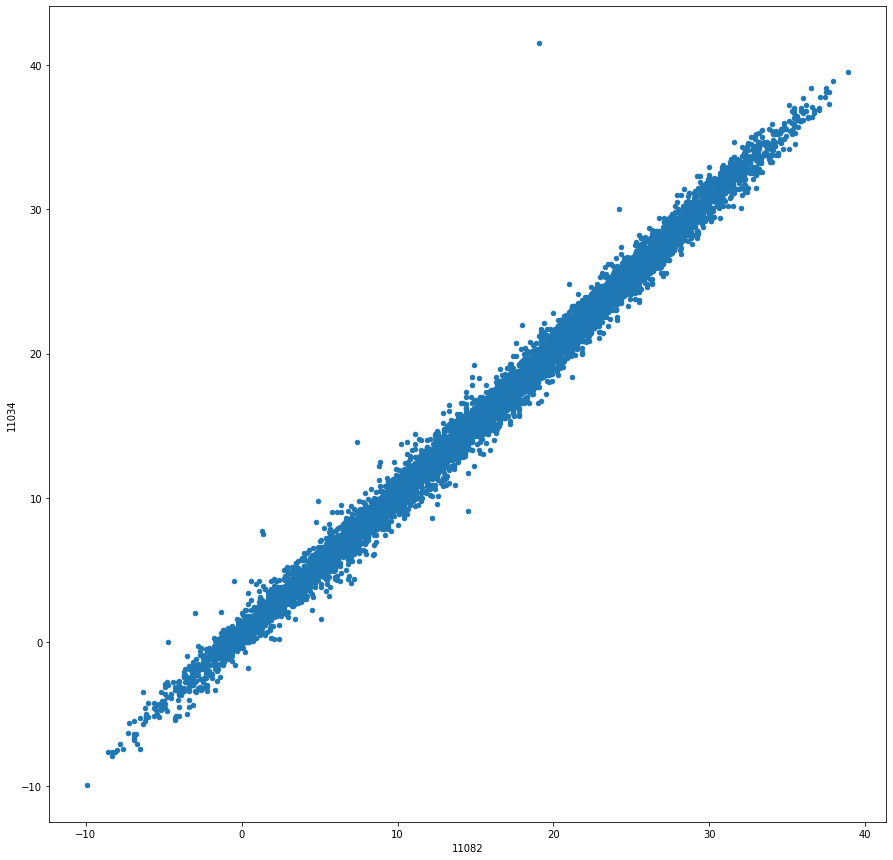

In [15]:
max_temps_by_station.plot.scatter(x=11082, y=11034, figsize=(15, 15));

Die Korrelation können wir nur für Zeilen berechnen, in denen für die Station 11034 und 11082 ein
Wert eingetragen ist. *notna()* niefert uns eine boolean Liste, ob ein Wert gesetzt ist. Mit dem
& operator verknpüfen wir die 2 Listen und verwenden *valid_data* als Filter. Diese Technik haben
wir von Anfang an bereits verwendet, nur haben wir die Filterliste mit *df[df.col == val]* indirekt
generiert.

Bei *corrcoef()* geben wir an, dass die Variablen als Spalten im Dataframe angegeben sind.

In [16]:
import numpy as np

valid_data = max_temps_by_station[11034].notna() & max_temps_by_station[11082].notna()
np.corrcoef(max_temps_by_station.loc[valid_data, [11082, 11034]], rowvar=False)
#Alternativ: np.corrcoef(max_temps_by_station.loc[valid_data, 11034], max_temps_by_station.loc[valid_data, 11082])

array([[1.        , 0.99600432],
       [0.99600432, 1.        ]])

Die Bergstation (Rax, ID 11180) können wir auch einbeziehen und die Korrelation zwischen jedem der
einzelnen Stationen ausgeben lassen. Mit 0.90 korreliert die Station natürlich schwächer mit der Wiener
Station, da sie auf 1500m Höhe liegt.

In [17]:
valid_data = max_temps_by_station[11034].notna() & max_temps_by_station[11082].notna() & max_temps_by_station[11180].notna()
np.corrcoef(max_temps_by_station.loc[valid_data, [11082, 11034, 11180]], rowvar=False)

array([[1.        , 0.99604204, 0.8983869 ],
       [0.99604204, 1.        , 0.90187362],
       [0.8983869 , 0.90187362, 1.        ]])